<h1> HW-3(AI2100/AI5100)</h1>

In [241]:
import numpy as np    
import matplotlib.image as mp
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import warnings
import pandas as pd
import seaborn as sns

In [242]:
#function which helps in padding the matrix by taking reflection through edges
def padding(im,b,row,col,m,n):
    p=abs(m-b+1)
    q=abs(n-b+1)
    if p>=row:
        p=2*row-p-2
    if q>=col:
        q=2*col-q-2
    return p,q    

In [243]:
def padding_func(im,K):
    #extracting the dimensions of the image
    row,col,a = im.shape
    arr = np.zeros([row+2*len(K)-2,col+2*len(K)-2,a])#taking zeros
    for i in range(row+2*len(K)-2):
        for j in range(col+2*len(K[0])-2):
            p,q=padding(im,len(K),row,col,i,j)#calling the padding fucntion
            for s in range(a):
                arr[i][j][s]=im[p][q][s]#assignng the values to the new array
    return arr

<h1> Non Linear Functions</h1>

In [244]:
def sigmoid_func(X):
    X=1.0/(1.0 + np.exp(-X))
    return X 
def tanh_func(X):
    X=np.tanh(X)
    return X
def relu(X):
    X=np.maximum(0,X)
    return X
def PReLU(X,val):
    X=np.maximum((-1)*val*X,X)
    return X

<h1>1)Convolution function</h1>

In [245]:
#function which returns the matrix after convolution
def convolution(im,im1,pad_id,stride,func=sigmoid_func,func_variable=0.01):
    if pad_id==1:
        im=padding_func(im,K)
    im1=np.flip(im1,0)
    im1=np.flip(im1,1)
    m1,n1,a1=im.shape
    m2,n2,a2=im1.shape
    x=((m1-m2)//stride)+1
    y=((n1-n2)//stride)+1#final dimensions
    z=a1
    sum=0
    arr = np.zeros([x,y,z])
    Arr=np.zeros([x,y])
    for a in range(x):
        for b in range(y):
            for f in range(z):
                for i,i1 in zip(range(a*stride, a*stride+m2),range(m2)):
                    for j,j1 in zip(range(b*stride,b*stride+n2),range(n2)):
                        sum+=im[i][j][f]*im1[i1][j1][f]#formula
                arr[a][b][f]=sum
                sum=0
    for a in range(x):
        for b in range(y):
            for c in range(z):
                Arr[a][b]+=arr[a][b][c]
                
    if func==PReLU:
        Arr=PReLU(Arr,func_variable)
        return Arr
    else:
        Arr=func(Arr)
    return Arr    

In [27]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 896s 5us/step


<h2>Taking Image Input</h2>

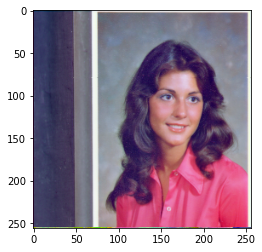

In [246]:
# reading the input image extracted from given database
im = mp.imread('4.1.04.tiff')
K=[[0, -1, 0,], [-1, 5,-1], [0, -1, 0]]#considering 3X3 kernel matrix
K=np.stack((K,K,K),2)#converting it to 2D
plt.imshow(im)#showing the img

<h2>Result of Convolution</h2>

(129, 129)


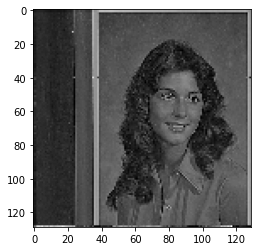

In [247]:
arr1=convolution(im,K,1,2,PReLU,0.02)
print(arr1.shape)
plt.imshow(arr1,cmap='gray')#plotting the image
plt.show()

<h1>2)Pooling Function</h1>

In [248]:
def pooling_func(im,max_pool,stride,window):
    m,n=im.shape
    x=((m-window)//stride)+1
    y=((n-window)//stride)+1#final dimensions
    Arr=np.zeros([x,y])
    for i in range(x):
        for j in range(y):
            if max_pool==1:
                Arr[i][j]=np.amax(im[i*stride:i*stride+window,j*stride:j*stride+window])
            else:
                Arr[i][j]=np.average(im[i*stride:i*stride+window,j*stride:j*stride+window])
    return Arr

<h2>Result of Pooling</h2>

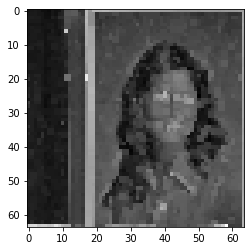

In [249]:
arr2=pooling_func(arr1,1,2,3)
plt.imshow(arr2,cmap='gray')#plotting the image
plt.show()

<h2>Function to generate random kernel matrix of size KxKxC</h2>

In [250]:
def random_kernel(no_of_kernels,C,K):
    arr = np.random.rand(no_of_kernels,K,K,C)
    return arr

<h2>3)Convolution Layer Function</h2>

In [251]:
def convolution_layer_func(im,kernel,no_of_kernels,stride,pad_id,func=sigmoid_func,func_variable=0.01):
    final_img=[]
    for x in range(no_of_kernels):
        final_img.append(convolution(im,kernel[x],pad_id,stride,func,func_variable))
    final_img=np.stack(final_img,2)
    return final_img

<h2>Output of Convolution Layer Function</h2>

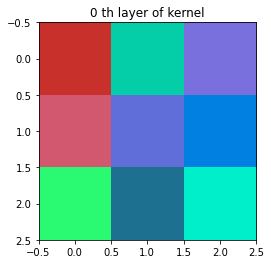

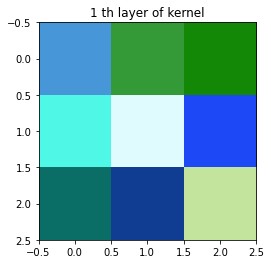

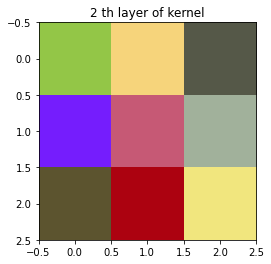

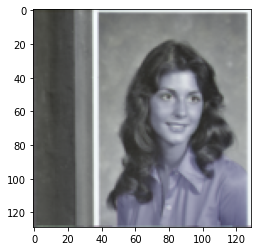

In [252]:
arr=random_kernel(3,3,3)

for i in range(len(arr[0])):
    plt.imshow(arr[i])
    plt.title('%i th layer of kernel' %i)
    plt.show()
    
arr1=convolution_layer_func(im,arr,3,2,1,PReLU,func_variable=0.02)
plt.imshow(arr1/np.amax(arr1))#plotting the image
plt.show()

<h2>4)Max_Pool_Layer Function</h2>

In [253]:
def max_pool_layer(im,max_pool,stride,window):
    a,b,c = im.shape
    final_img1=[]
    for i in range(c):
        final_img1.append(pooling_func(im[:,:,i],max_pool,stride,window))
    final_img1=np.stack(final_img1,2)
    return final_img1

<h2>output Image after pooling by layer</h2>

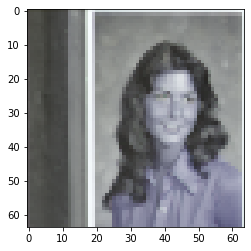

(64, 64, 3)


In [254]:
Arr2=max_pool_layer(arr1,1,2,2)
plt.imshow(Arr2/np.amax(Arr2))#plotting the image
plt.show()
print(Arr2.shape)

<h2>5)Flattening function using random weights matrix</h2>

In [255]:
def flatten_func(im,size):
    var=im.flatten()
    a,b,c=im.shape
    temp=np.random.rand(size,len(var))
    final_img3=temp@var
    return final_img3
        

<h2>Output after Flattening</h2>

In [256]:
Arr3=flatten_func(Arr2,100)
print(Arr3)

[10435168.43831362 10413300.07819809 10338222.83653895 10377200.93653386
 10290243.56291256 10432058.37509076 10346894.44639287 10421080.68747223
 10364952.96881454 10544712.99367052 10362294.42596564 10419402.60863575
 10437763.49280421 10365262.09737373 10336669.20366316 10374409.52384964
 10517954.87390195 10304001.53548268 10294227.1714892  10283542.24222647
 10386888.88550691 10364863.54184372 10319681.14468305 10371909.06372793
 10398955.93034664 10260599.29112524 10393022.2334203  10395484.24969393
 10269726.74162035 10391546.07947381 10357153.34398653 10375508.36886997
 10364471.168297   10412448.64278341 10372554.26706173 10365014.11044358
 10298266.40880793 10294760.58924729 10382631.4702949  10481490.3835201
 10353886.42067083 10420164.54670643 10335343.35214946 10355652.03010842
 10330273.27370615 10370908.52330973 10329677.19924149 10328629.82808268
 10213247.90951142 10305617.52617791 10365190.33039412 10378962.82829968
 10439964.26091431 10401795.09381628 10300483.867932

<h2>Softmax Function</h2>

In [257]:
def softmax(vec):
    k=len(vec)
    s=0
    Arr=np.zeros([k])
    for i in range(k):
        s+=np.exp(vec[i])
    for i in range(k):
        Arr[i]=np.exp(vec[i])/s
    return Arr

<h2>6)MLP Function</h2>

In [258]:
def MLP_function(vec,no_of_layers,size,output_size,func=sigmoid_func,softmax_var=False):
    for i in range(no_of_layers):
        b=np.random.rand()
        arr = np.random.rand(size[i],len(vec))
        vec=arr@vec+b
        vec=func(vec)
    arr1=np.random.rand(output_size,len(vec))
    vec=arr1@vec
    if softmax_var==True:
        return softmax(vec)
    return vec

<h2>Calling MLP function taking random sizes for hidden layers</h2>

In [259]:
size=[80,60]
arr4=MLP_function(Arr3,2,size,50,sigmoid_func,True)
print(arr4)

[5.09275221e-04 1.05071652e-04 1.06516155e-02 1.04066567e-02
 4.25888448e-03 1.24043881e-02 3.06349572e-03 1.40021257e-04
 1.57105640e-02 3.18007271e-02 8.47732235e-04 4.22932265e-02
 4.55012167e-02 6.80543084e-02 8.97780206e-03 8.35337062e-03
 1.60254612e-04 3.48247387e-04 2.97568615e-03 5.96064137e-04
 1.05892846e-02 2.03507405e-03 8.50138389e-04 1.30542089e-01
 8.80193555e-02 8.22154344e-03 6.09384513e-03 5.52870059e-02
 5.86690409e-05 5.16919424e-03 7.74769895e-02 6.65568517e-02
 2.10893662e-03 1.34362921e-03 1.05257679e-02 3.97710120e-04
 3.96434391e-04 2.38124368e-02 1.16214112e-03 1.70792432e-02
 2.96430615e-04 7.96162142e-03 2.05803752e-03 1.78926276e-01
 1.83484494e-04 2.92808271e-03 1.52319495e-02 6.17725829e-04
 9.64966616e-03 7.26177735e-03]


<h2>7)feed_forward_path which takes image input and outputs a vector with output size</h2>

In [260]:
def feed_forward_path(im,kernel,no_of_kernels,stride,pad_id,max_pool,window_pooling,no_of_hidden_layers,output_size,softmax_var=True,func=sigmoid_func,func_variable=0.01):
    Arr1=convolution_layer_func(im,kernel,no_of_kernels,stride,pad_id,func,func_variable)
    Arr2=max_pool_layer(Arr1,max_pool,stride,window_pooling)
    no_of_kernels_2=8
    k1,k2,c=Arr2.shape
    kernel_arr_2=random_kernel(no_of_kernels_2,c,3)
    Arr3=convolution_layer_func(im,kernel_arr_2,no_of_kernels_2,stride,pad_id,func,func_variable)
    Arr4=max_pool_layer(Arr3,max_pool,stride,window_pooling)
    m,n,p=Arr4.shape
    Arr5=flatten_func(Arr4,50)
    size=[]
    for i in range(no_of_hidden_layers):
        size.append(np.random.randint(20,100))
    Arr6=MLP_function(Arr5,no_of_hidden_layers,size,output_size,sigmoid_func,softmax_var)
    return Arr6

<h2>Printing the 16 randomly taken kernels as given in the question</h2>

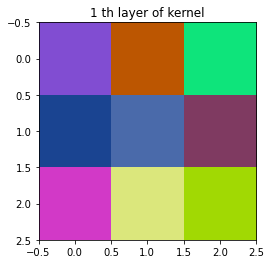

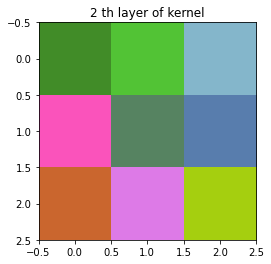

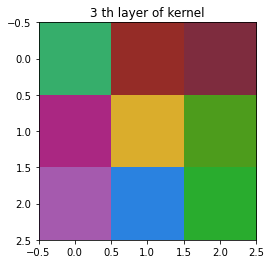

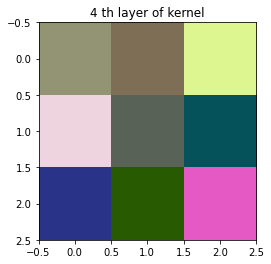

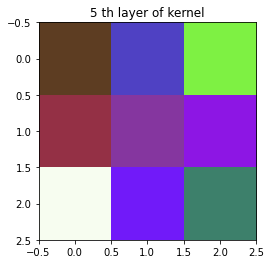

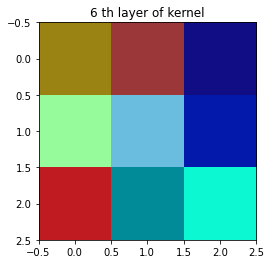

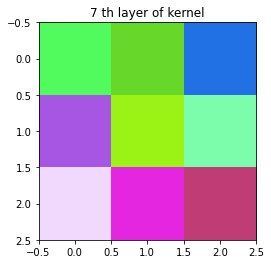

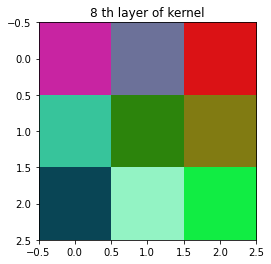

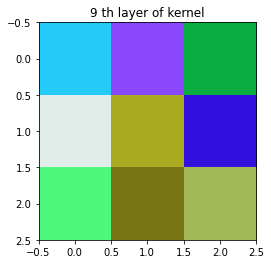

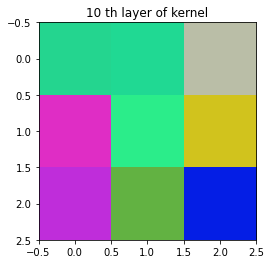

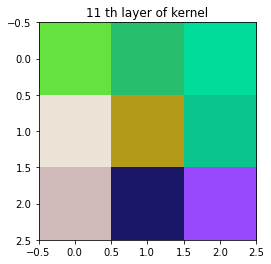

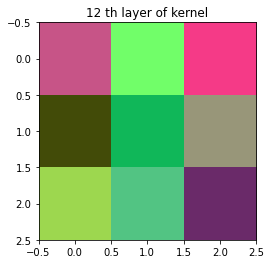

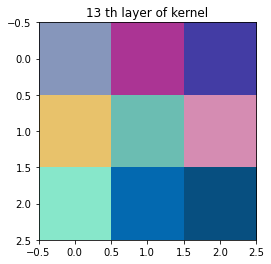

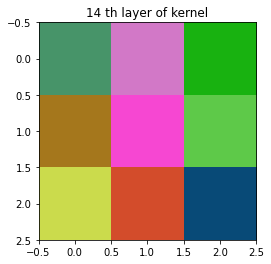

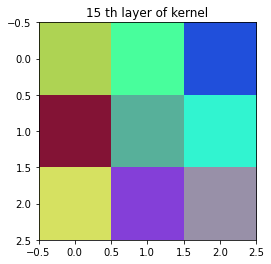

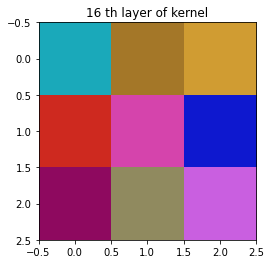

In [261]:
for i in range(no_of_kernels):
    plt.imshow(kernel_arr[i],cmap='gray')
    plt.title('%i th layer of kernel' %(i+1))
    plt.show()

<h2>printing the output vector after passing the image  </h2>

In [262]:
kernel_arr=random_kernel(16,3,3)
no_of_kernels,k1,k2,c=kernel_arr.shape
stride=2
window_pooling=2
func=sigmoid_func
pad_id=1
max_pool=1
no_of_hidden_layers=1
output_size=10
softmax_var=True
final_output_arr=feed_forward_path(im,kernel_arr,no_of_kernels,stride,pad_id,max_pool,window_pooling,no_of_hidden_layers,output_size,softmax_var)
print(final_output_arr)

[0.01926565 0.1445365  0.1618864  0.04413752 0.40751081 0.01118863
 0.08909554 0.04929416 0.06946111 0.00362369]


<h2>Funcion which takes image label and count as input and stores the required no of images pixel values img_vect array</h2>

In [263]:
img_vect=[]
def list_of_cifar_images(image_label,no_of_images):
    count,temp=0,0
    while(count<no_of_images):
        if(y_train[temp][0] == image_label):
            count +=1
            img_vect.append(x_train[temp])
        temp+=1

<h2>8a)taking 10 images as input taking 1 from each class and printing the resultant vector for all the images </h2>


vector of 1 th Image:
[5.33431675e-02 1.23173699e-02 4.28357546e-01 7.99277777e-02
 2.84173841e-02 1.07281087e-02 1.35656114e-04 2.50729682e-01
 9.83121453e-02 3.77311624e-02]


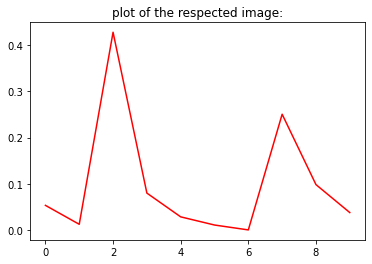


vector of 2 th Image:
[0.03830316 0.02025522 0.02547504 0.13528204 0.03606414 0.04420603
 0.02512113 0.45449377 0.21971152 0.00108794]


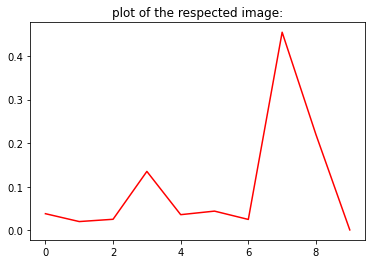


vector of 3 th Image:
[1.21434287e-04 7.71330422e-04 2.12038276e-03 1.25799419e-02
 1.16727644e-02 1.31637495e-02 3.00458415e-04 1.98549012e-02
 8.68956097e-01 7.04589406e-02]


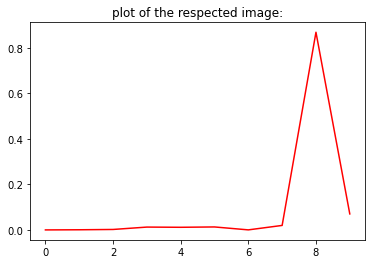


vector of 4 th Image:
[1.41414158e-03 1.90535262e-02 1.20662083e-03 9.13683378e-01
 2.67292909e-04 7.74873259e-05 4.99082973e-05 5.79104119e-02
 1.61159605e-03 4.72563713e-03]


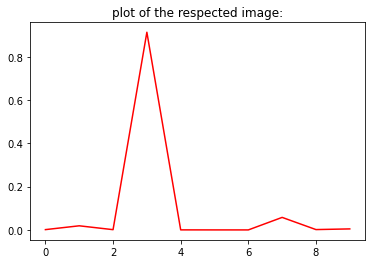


vector of 5 th Image:
[1.22597890e-03 7.54462529e-02 1.37203328e-01 6.52163829e-01
 5.53676708e-02 9.85943698e-04 1.55404492e-02 4.06336207e-05
 2.60314313e-03 5.94227711e-02]


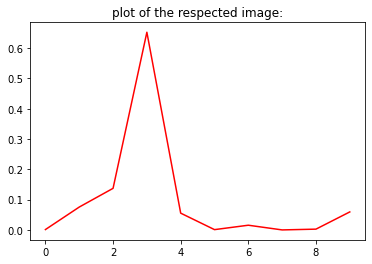


vector of 6 th Image:
[5.96243276e-03 1.28270620e-01 4.13322734e-04 6.53277249e-04
 6.00709360e-03 1.61442053e-04 1.71844500e-03 8.29494385e-01
 1.51629063e-02 1.21560753e-02]


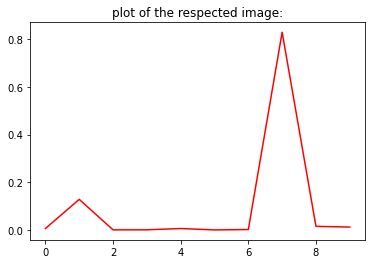


vector of 7 th Image:
[7.53607127e-03 8.55857272e-04 9.74191507e-02 4.16158942e-04
 2.22197611e-02 9.62196511e-03 2.80720787e-02 4.82074253e-04
 8.33288858e-01 8.80247521e-05]


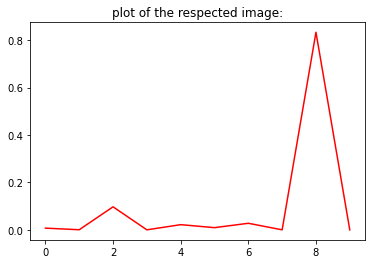


vector of 8 th Image:
[0.00334975 0.28312533 0.11001824 0.05449563 0.43611041 0.0352278
 0.04388553 0.00055917 0.02176026 0.01146788]


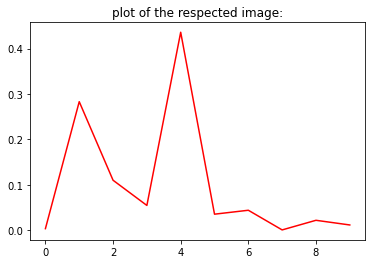


vector of 9 th Image:
[0.16444334 0.05622197 0.02564649 0.04616287 0.06349601 0.39201495
 0.1911143  0.00885975 0.00737446 0.04466585]


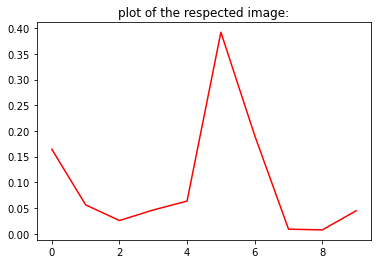


vector of 10 th Image:
[0.129804   0.01864826 0.00914485 0.01042458 0.07436382 0.02088857
 0.25426586 0.23752838 0.24423478 0.00069689]


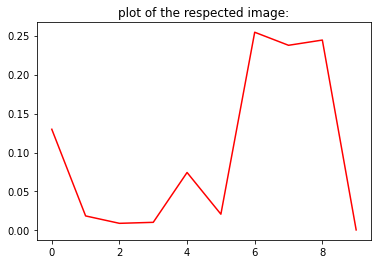

In [264]:
img_vect=[]
for i in range(10):
    list_of_cifar_images(i,1)
x_arr=[]
for i in range(output_size):
    x_arr.append(i)
final_output_vec=[]
for i in range(len(IM)):
    final_output_vec.append(feed_forward_path(img_vect[i],kernel_arr,no_of_kernels,stride,pad_id,max_pool,window_pooling,no_of_hidden_layers,output_size,softmax_var))
    print("\nvector of",(i+1),"th Image:")
    print(final_output_vec[i])
    y = np.array(final_output_vec[i])
    plt.title('plot of the respected image:')
    plt.plot(x_arr, y, color='red')
    plt.show()
img_vect=[]

<h2>Observations</h2>
As all the kernels are randoly taken and the size of hidden layers are randomly taken so there is no specific pattern(trend) followed by all these vectors and after observing their plots the slightest pattern(trend) that which can be observed is that there is definitely a peak in every plot which is considerably large when compared to all other points in the plot 

<h3>label_vect stores all the label values for all these 30 images(3 from each class) and as list_of_cifar_images(i,3) is being called for 10 times so there will be 30 appends in img_vect </h3>

In [265]:
label_vect=[]
for i in range(10):
    list_of_cifar_images(i,3)
    label_vect.append(i)
    label_vect.append(i)
    label_vect.append(i)

<h2>feed_forward_path_TSNE takes image as input and outputs the flattened vector</h2>

In [266]:
def feed_forward_path_TSNE(im,kernel,no_of_kernels,stride,pad_id,max_pool,window_pooling,no_of_hidden_layers,output_size,softmax_var=True,func=sigmoid_func,func_variable=0.01):
    Arr1=convolution_layer_func(im,kernel,no_of_kernels,stride,pad_id,func,func_variable)
    Arr2=max_pool_layer(Arr1,max_pool,stride,window_pooling)
    no_of_kernels_2=8
    k1,k2,c=Arr2.shape
    kernel_arr_2=random_kernel(no_of_kernels_2,c,3)
    Arr3=convolution_layer_func(im,kernel_arr_2,no_of_kernels_2,stride,pad_id,func,func_variable)
    Arr4=max_pool_layer(Arr3,max_pool,stride,window_pooling)
    m,n,p=Arr4.shape
    Arr5=flatten_func(Arr4,50)
    return Arr5

<h2>refreshing the kernel everytime for iteartion and appending the flattened vector in image_array </h2>

In [267]:
image_array=[]
for i in range(30):
    image_array.append(feed_forward_path_TSNE(img_vect[i],kernel_arr,no_of_kernels,stride,pad_id,max_pool,window_pooling,no_of_hidden_layers,output_size,softmax_var))
    kernel_arr=random_kernel(16,3,3)

<h2>8b)Plot for all the 30 images being coloured according to their class values</h2>

[Text(0.5, 1.0, ' T-SNE projection for 30 image plots data coloured according to their labels')]

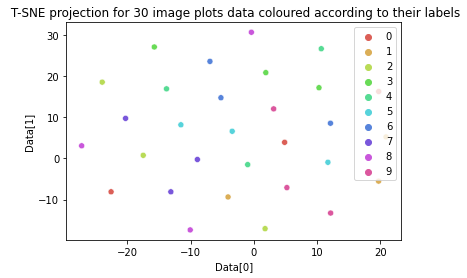

In [268]:
warnings.filterwarnings('ignore')
df = pd.DataFrame()
final_TSNE_array = TSNE(n_components=2).fit_transform(image_array)
df["y"] = label_vect
df["Data[0]"] = final_TSNE_array[:,0]
df["Data[1]"] = final_TSNE_array[:,1]
sns.scatterplot(x="Data[0]", y="Data[1]", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title=" T-SNE projection for 30 image plots data coloured according to their labels")
 


<h3>as by observing the above plot we can state that randomly initialized network doesn't show any discriminability</h3>